# Projeto de Machine Learning - Previsão de Doenças Relacionadas ao Clima

Neste projeto, usamos um dataset com dados meteorológicos e sintomas para prever diferentes doenças.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### 1. Carregamento dos dados

In [3]:
df = pd.read_csv("Weather-related disease prediction.csv")
df.head()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


### 2. Separação entre variáveis preditoras e alvo

In [4]:
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

### 3. Divisão entre treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treinamento do modelo (Random Forest)

In [6]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. Avaliação do modelo

In [12]:
y_pred = modelo.predict(X_test)
relatorio = classification_report(y_test, y_pred)
print(relatorio)

              precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        58
 Common Cold       0.91      0.98      0.94        59
      Dengue       0.98      0.98      0.98        58
      Eczema       1.00      1.00      1.00        68
Heart Attack       1.00      0.99      1.00       192
 Heat Stroke       0.97      1.00      0.99        71
   Influenza       0.99      0.96      0.97       136
     Malaria       1.00      0.98      0.99        61
    Migraine       0.98      1.00      0.99       201
   Sinusitis       1.00      1.00      1.00        57
      Stroke       0.99      0.95      0.97        79

    accuracy                           0.99      1040
   macro avg       0.98      0.99      0.98      1040
weighted avg       0.99      0.99      0.99      1040



### 6. Gráfico de Importância das Variáveis

C:\Users\andressa.vieira\AppData\Local\Temp\ipykernel_2228\1963668275.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias_df.head(15), x="Importância", y="Variável", palette="viridis")
C:\Users\andressa.vieira\AppData\Local\Temp\ipykernel_2228\1963668275.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\andressa.vieira\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


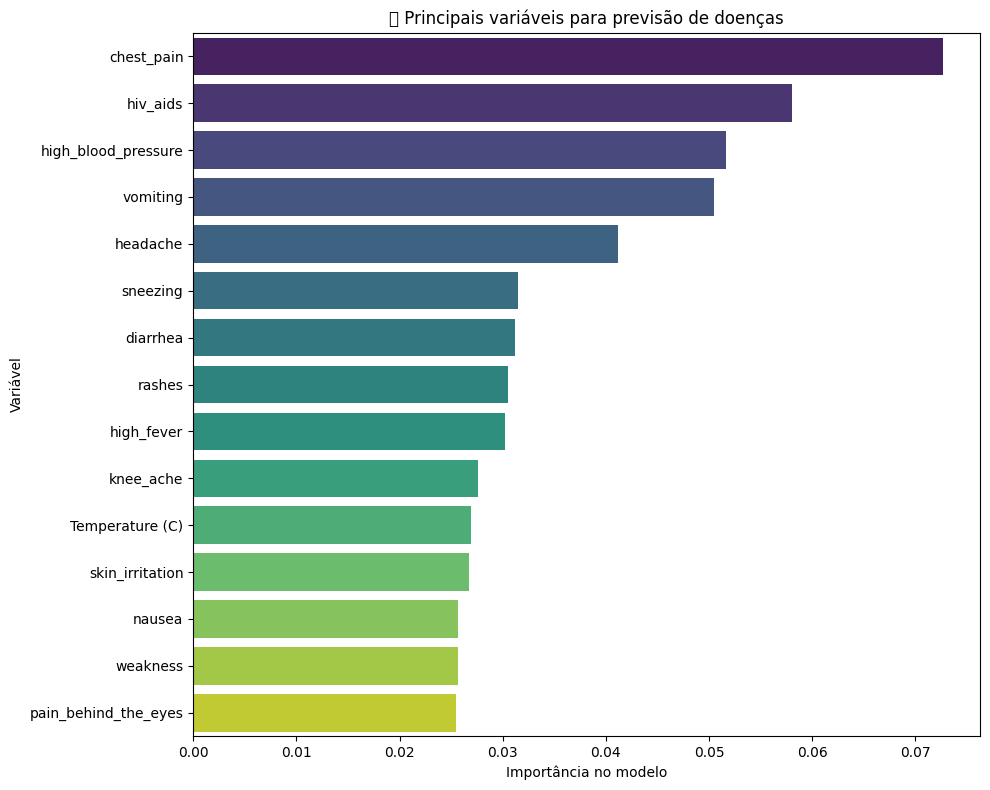

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obter importância das variáveis do modelo
importancias = modelo.feature_importances_
nomes_variaveis = X.columns

# Organizar em DataFrame
importancias_df = pd.DataFrame({
    "Variável": nomes_variaveis,
    "Importância": importancias
}).sort_values(by="Importância", ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 8))
sns.barplot(data=importancias_df.head(15), x="Importância", y="Variável", palette="viridis")
plt.title("🔍 Principais variáveis para previsão de doenças")
plt.xlabel("Importância no modelo")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


Ali Shan, Iqra Amir, & Mustafa Kamal. (2024). Weather-related Disease Prediction Dataset [Data set]. Zenodo. https://doi.org/10.5281/zenodo.11366485